<div style="font-size:22pt; line-height:25pt; font-weight:bold; text-align:center;">Differential evolution algorithm</div>

1. [Introduction](#int)
2. [L'algorithme DE](#de)
    1. [Pseudo-code](#pseudo)
    2. [DE python code](#code)
    3. [Test](#de)
        - [Sphere function](#sf)
        - [Rosenbrock function](#rf)
        - [Ackley function](#af)
        - [Beale function](#bf)
        
    4. [Comparison Python](#bf)  
3. [Polynomial curve fitting example](#curve_fitting)
4. [DE variations](#var)
5. [References](#ref)


# <a id="data"></a> Introduction

Besides particle swarm optimization (PSO) which I touched on previously, differential evolution (DE) is one of my go-to favorites. Just like PSO, differential evolution falls within the evolutionary algorithms (EA) family. Differential evolution is very similar to genetic algorithms (GA) which are based on the principles of evolutionary biology such as mutation, crossover, and selection.

Differential evolution is basically a genetic algorithm that natively supports float value based cost functions.

<div class="alert alert-success">
<b>Hypothèses:</b>
<ul>
<li>
    
</li>

<li>
    
</li>
</ul>
</div>

<div class="alert alert-warning">
<b>Limitations:</b>
<ul>
<li>
    
</li>

<li>
    
</li>
</ul>
</div>


# <a id="de"></a> L'algorithme DE

This algorithm, invented by R. Storn and K. Price in 1997, is a very powerful algorithm for black-box optimization (also called derivative-free optimization)

## <a id="pseudo"></a> Pseudo-code

1) Initialize a random population of individuals throughout the search space.

2) while iter <= max num of generations

    3) cycle through each individual in the population
    
        3.A) perform mutation
            
        3.B) perform recombination ("crossover" in GA lingo)
            
        3.C) perform selection
            
    4) if stopping criterion has been met:
            exit and return best individual
            
        else:
            iter = iter + 1
            go back to step #3


An evolutionary algorithm is an algorithm that uses mechanisms inspired by the theory of evolution, where the fittest individuals of a population (the ones that have the traits that allow them to survive longer) are the ones that produce more offspring, which in turn inherit the good traits of the parents. This makes the new generation more likely to survive in the future as well, and so the population improves over time, generation after generation. This is possible thanks to different mechanisms present in nature, such as mutation, recombination and selection, among others. Evolutionary algorithms apply some of these principles to evolve a solution to a problem.

Solutions are represented as populations of individuals (or vectors), where each individual is represented by a set of real numbers. These real numbers are the values of the parameters of the function that we want to minimize, and this function measures how good an individual is.

In [49]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.optimize import rosen, differential_evolution


In [50]:
def de(fobj, bounds, mut=0.8, crossp=0.7, popsize=20, its=1000):
    
#   creation of a population with popsize individuals
#   An individual is just an instantiation of the parameters of the function fobj
#   initializes the individuals by generating random values for each parameter within the given bounds
#   I generate uniform random numbers between 0 and 1, and then I scale the parameters

    dimensions = len(bounds)
    pop = np.random.rand(popsize, dimensions)
    min_b, max_b = np.asarray(bounds).T
    diff = np.fabs(min_b - max_b)
    
#   evaluate each vector with the function fobj
    pop_denorm = min_b + pop * diff
#   the evaluation of this initial population is done and stored
    fitness = np.asarray([fobj(ind) for ind in pop_denorm])
    best_idx = np.argmin(fitness)
    best = pop_denorm[best_idx]
    
    for i in range(its):
        for j in range(popsize):
            idxs = [idx for idx in range(popsize) if idx != j]
            
#           for each vector pop[j] in the population, we select three other vectors, a, b & c
            a, b, c = pop[np.random.choice(idxs, 3, replace = False)]
    
#           we create a mutant vector by combining a, b and c by computing the difference (differential evolution) 
#           A larger mutation factor increases the search radius but may slowdown the convergence of the algorithm.
#           Values for mut are usually chosen from the interval [0.5, 2.0].
            mutant = np.clip(a + mut * (b - c), 0, 1)
#           note that values greater than 1 become 1, and the values smaller than 0 become 0

#           recombination is about mixing the information of the mutant with the information of the current vector 
#           to create a trial vector.
#           For each position, we decide (with some probability defined by crossp) if that number will be replaced
#           or not by the one in the mutant at the same position.
            cross_points = np.random.rand(dimensions) < crossp
            if not np.any(cross_points):
                cross_points[np.random.randint(0, dimensions)] = True
            trial = np.where(cross_points, mutant, pop[j])
            trial_denorm = min_b + trial * diff
            f = fobj(trial_denorm)
            if f < fitness[j]:
                fitness[j] = f
                pop[j] = trial
                if f < fitness[best_idx]:
                    best_idx = j
                    best = trial_denorm
                    
#       After this process, some of the original vectors of the population will be replaced by better ones,
#       and after many iterations, the whole population will eventually converge towards the solution 
        yield best, fitness[best_idx]

## <a id="test"></a> Test

In applied mathematics, test functions, known as artificial landscapes, are useful to evaluate characteristics of optimization algorithms, such as:

    Convergence rate.
    Precision.
    Robustness.
    General performance.
    
Here some test functions : https://en.wikipedia.org/wiki/Test_functions_for_optimization

### <a id="sf"></a> Sphere function


In [4]:
# fobj = lambda x: sum(x**2)/len(x)

it = list(de(fobj, bounds=[(-100, 100)]))
print(it[-1])

(array([0.]), 0.0)


In [1]:
def fobj(x):
    value = 0
    for i in range(len(x)):
        value += x[i]**2
    return value / len(x)

In [16]:
# from yabox.problems import problem
# problem(lambda x: sum(x**2)/len(x), bounds=[(-5, 5)] * 2).plot3d()

### <a id="rf"></a> Rosenbrock function

In [51]:
result = list(de(rosen, bounds, its=5000))
print(result[-1])

(array([0.67899082, 0.45866467, 0.20189516, 0.        , 0.        ]), 2.2069600619324206)


### <a id="af"></a>Ackley function


### <a id="bf"></a> Bale function

DE doesn’t guarantee to obtain the global minimum of a function. What it does is to approach the global minimum in successive steps, as shown in Fig. 1. So in general, the more complex the function, the more iterations are needed. This can raise a new question: how does the dimensionality of a function affects the convergence of the algorithm? In general terms, the difficulty of finding the optimal solution increases exponentially with the number of dimensions (parameters). This effect is called “curse of dimensionality”.

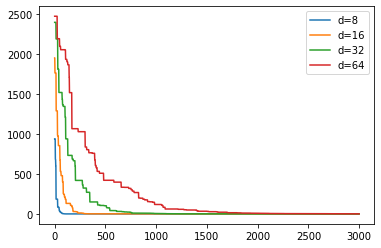

In [14]:
for d in [8, 16, 32, 64]:
    it = list(de(lambda x: sum(x**2)/d, [(-100, 100)] * d, its=3000))    
    x, f = zip(*it)
    plt.plot(f, label='d={}'.format(d))
plt.legend()

# <a id="comp"></a> Comparaison PYTHON




In [52]:
bounds = [(0,2), (0, 2), (0, 2), (0, 2), (0, 2)]
result = differential_evolution(rosen, bounds)
result.x, result.fun

(array([1., 1., 1., 1., 1.]), 0.0)

# <a id="curve_fitting"></a> Polynomial curve fitting example

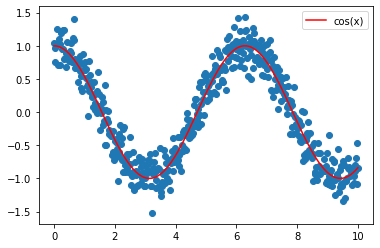

In [29]:
>>> x = np.linspace(0, 10, 500)
>>> y = np.cos(x) + np.random.normal(0, 0.2, 500)
>>> plt.scatter(x, y)
>>> plt.plot(x, np.cos(x), label='cos(x)',c='r')
>>> plt.legend()

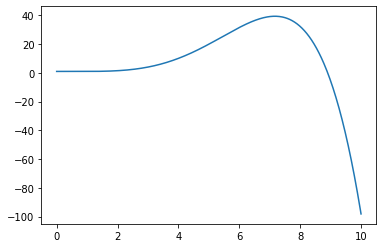

In [24]:
def fmodel(x, w):
    return w[0] + w[1]*x + w[2] * x**2 + w[3] * x**3 + w[4] * x**4 + w[5] * x**5

plt.plot(x, fmodel(x, [1.0, -0.01, 0.01, -0.1, 0.1, -0.01]))

In [25]:
def rmse(w):
    y_pred = fmodel(x, w)
    return np.sqrt(sum((y - y_pred)**2) / len(y))

In [30]:
result = list(de(rmse, [(-5, 5)] * 6, its=2000))
result[-1][0]

(array([-5.00000000e+00,  5.00000000e+00, -2.21735281e+00,  4.83742691e-01,
        -4.85131513e-02,  1.76995705e-03]), 1.4313281098446244)

In [35]:
result[-1][0]

array([ 0.95762832,  0.5914102 , -1.46869134,  0.53128145, -0.06763608,
        0.00284652])

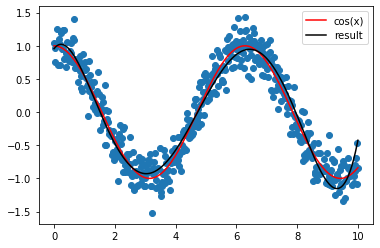

In [44]:
plt.scatter(x, y)
plt.plot(x, np.cos(x), label='cos(x)',c='r')
plt.plot(x, fmodel(x, result[-1][0]), label='result',c='k')
plt.legend()

Now let’s see in action how the algorithm evolve the population of random vectors until all of them converge towards the solution

In [45]:
def de_anim(fobj, bounds, mut=0.8, crossp=0.7, popsize=20, its=1000):
    
#   creation of a population with popsize individuals
#   An individual is just an instantiation of the parameters of the function fobj
#   initializes the individuals by generating random values for each parameter within the given bounds
#   I generate uniform random numbers between 0 and 1, and then I scale the parameters

    dimensions = len(bounds)
    pop = np.random.rand(popsize, dimensions)
    min_b, max_b = np.asarray(bounds).T
    diff = np.fabs(min_b - max_b)
    
#   evaluate each vector with the function fobj
    pop_denorm = min_b + pop * diff
#   the evaluation of this initial population is done and stored
    fitness = np.asarray([fobj(ind) for ind in pop_denorm])
    best_idx = np.argmin(fitness)
    best = pop_denorm[best_idx]
    
    for i in range(its):
        for j in range(popsize):
            idxs = [idx for idx in range(popsize) if idx != j]
            
#           for each vector pop[j] in the population, we select three other vectors, a, b & c
            a, b, c = pop[np.random.choice(idxs, 3, replace = False)]
    
#           we create a mutant vector by combining a, b and c by computing the difference (differential evolution) 
#           A larger mutation factor increases the search radius but may slowdown the convergence of the algorithm.
#           Values for mut are usually chosen from the interval [0.5, 2.0].
            mutant = np.clip(a + mut * (b - c), 0, 1)
#           note that values greater than 1 become 1, and the values smaller than 0 become 0

#           recombination is about mixing the information of the mutant with the information of the current vector 
#           to create a trial vector.
#           For each position, we decide (with some probability defined by crossp) if that number will be replaced
#           or not by the one in the mutant at the same position.
            cross_points = np.random.rand(dimensions) < crossp
            if not np.any(cross_points):
                cross_points[np.random.randint(0, dimensions)] = True
            trial = np.where(cross_points, mutant, pop[j])
            trial_denorm = min_b + trial * diff
            f = fobj(trial_denorm)
            if f < fitness[j]:
                fitness[j] = f
                pop[j] = trial
                if f < fitness[best_idx]:
                    best_idx = j
                    best = trial_denorm
                    
#       After this process, some of the original vectors of the population will be replaced by better ones,
#       and after many iterations, the whole population will eventually converge towards the solution 
        yield min_b + pop * diff, fitness, best_idx

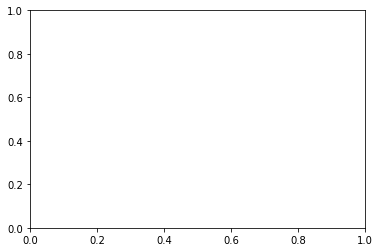

In [47]:
import matplotlib.animation as animation
from IPython.display import HTML

result = list(de_anim(rmse, [(-5, 5)] * 6, its=2000))

fig, ax = plt.subplots()

def animate(i):
    ax.clear()
    ax.set_ylim([-2, 2])
    ax.scatter(x, y)
    pop, fit, idx = result[i]
    for ind in pop:
        data = fmodel(x, ind)
        ax.plot(x, data, alpha=0.3)

In [48]:
anim = animation.FuncAnimation(fig, animate, frames=2000, interval=20)
HTML(anim.to_html5_video())

RuntimeError: Requested MovieWriter (ffmpeg) not available

# <a id="var"></a> DE Variations

The schema used in this version of the algorithm is called rand/1/bin because the vectors are randomly chosen (rand), we only used 1 vector difference and the crossover strategy used to mix the information of the trial and the target vectors was a binomial crossover. But there are other variants:

<div class="alert alert-warning">

<ul> 
<li><b>Mutation schemas:</b>
<li><b>Crossover schemas:</b>


In conclusion, Differential Evolution (DE) is a very simple but powerful algorithm for optimization of complex functions that works pretty well in those problems where other techniques (such as Gradient Descent) cannot be used. In this post, we’ve seen how to implement it in just 27 lines of Python with Numpy, and we’ve seen how the algorithm works step by step.

# <a id="ref"></a> References

Useful imports and configuration:

Pygmo. A powerful library for numerical optimization, developed and mantained by the ESA. Pygmo is a scientific library providing a large number of optimization problems and algorithms under the same powerful parallelization abstraction built around the generalized island-model paradigm.

Platypus. Platypus is a framework for evolutionary computing in Python with a focus on multiobjective evolutionary algorithms (MOEAs). It differs from existing optimization libraries, including PyGMO, Inspyred, DEAP, and Scipy, by providing optimization algorithms and analysis tools for multiobjective optimization

Scipy. The well known scientific library for Python includes a fast implementation of the Differential Evolution algorithm.